<a href="https://colab.research.google.com/github/xrhd/NeuralSymbolic-Demo/blob/master/NeuralSymbolic_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NeuralSymbolic - Demo

## Dependencies

In [1]:
"""
É necessário instalar essas exatas versões
"""
!pip install keras-rectified-adam
!pip install tensorflow==1.8.0
!pip install keras==2.1.5

  Created wheel for keras-rectified-adam: filename=keras_rectified_adam-0.17.0-cp36-none-any.whl size=14781 sha256=8a09233353c759970c6906a96f5cd61f540c868be14caf5d10d85d2fa44b9db7
  Stored in directory: /root/.cache/pip/wheels/7b/01/27/3a934e1a5644f5b93c720422a6ef97034ea78a21ba71cfb549
Successfully built keras-rectified-adam
     |████████████████████████████████| 49.1MB 62kB/s 
     |████████████████████████████████| 3.1MB 42.4MB/s 
     |████████████████████████████████| 890kB 42.8MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107222 sha256=fbaf1f178d6f2ce81f6d871ce7185be64b9e1b983230029788b3ed4a1eafe67a
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation: bleach 3.2.1
    Uninstalling bleach-3.2.1:
      Succe

In [2]:
import tqdm
import numpy as np
import pandas as pd
from sklearn.model_selection import LeaveOneOut, KFold
import keras 
from keras.models import Sequential, Model
from keras.layers import Dense, Input, concatenate
from keras.losses import binary_crossentropy
from keras.utils  import plot_model
from keras_radam import RAdam
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:522: FutureWarn

In [3]:
seed_value= 0

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.set_random_seed(seed_value)

# 5. Configure a new global `tensorflow` session
from keras import backend as K
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

In [4]:
"""
Antes de rodar o código, é necessário fazer upload do arquivo 'trains-transformed.csv'
é possível encontrar esse arquivo no seguinte link do git hub
https://github.com/xrhd/NeuralSymbolic-Demo/blob/master/trains-transformed.csv
baixe o csv e faça upload do arquivo da sua máquina para esse notebook feito no colab
"""
from google.colab import files
uploaded = files.upload()

Saving trains-transformed.csv to trains-transformed.csv


## GET data

In [5]:
# path to trains-transformed.csv
path = './trains-transformed.csv'
str_att = {
  'length': ['short', 'long'],
  'shape': ['closedrect', 'dblopnrect', 'ellipse', 'engine', 'hexagon',
          'jaggedtop', 'openrect', 'opentrap', 'slopetop', 'ushaped'],
  'load_shape': ['circlelod', 'hexagonlod', 'rectanglod', 'trianglod'],
  'Class_attribute': ['west','east']
}

def read_data(path=path):
  df = pd.read_csv(path, ',')

  for k in df:
    for att in str_att:
      if k.startswith(att):
        for i,val in enumerate(df[k]):
          if val in str_att[att]:
            df[k][i] = str_att[att].index(val)

  df.replace("\\0", 0, inplace=True)
  df.replace("None", -1, inplace=True)

  return df

df = read_data()
df

,Number_of_cars,Number_of_different_loads,num_wheels1,length1,shape1,num_loads1,load_shape1,num_wheels2,length2,shape2,num_loads2,load_shape2,num_wheels3,length3,shape3,num_loads3,load_shape3,num_wheels4,length4,shape4,num_loads4,load_shape4,Rectangle_next_to_rectangle,Rectangle_next_to_triangle,Rectangle_next_to_hexagon,Rectangle_next_to_circle,Triangle_next_to_triangle,Triangle_next_to_hexagon,Triangle_next_to_circle,Hexagon_next_to_hexagon,Hexagon_next_to_circle,Circle_next_to_circle,Class_attribute
0,5,4,2,1,6,3,2,2,0,8,1,3,3,1,6,1,1,2,0,6,1,0,0,1,0,0,0,1,0,0,1,0,1
1,4,3,2,0,9,1,3,2,0,7,1,2,2,0,0,2,0,-1,-1,-1,-1,-1,0,1,0,1,0,0,0,0,0,0,1
2,4,2,2,0,6,1,0,2,0,4,1,3,3,1,0,1,3,-1,-1,-1,-1,-1,0,0,0,0,1,0,1,0,0,0,1
3,5,2,2,0,7,1,3,2,0,1,1,3,2,0,2,1,2,2,0,6,1,2,1,1,0,0,1,0,0,0,0,0,1
4,4,3,2,0,1,1,3,3,1,0,1,2,2,0,0,1,0,-1,-1,-1,-1,-1,0,1,0,1,0,0,0,0,0,0,1
5,3,2,2,1,0,3,0,2,0,6,1,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,0,0,0,0,1,0,0,0,0
6,4,2,2,0,1,1,0,2,0,9,1,3,2,1,5,0,-1,-1,-1,-1,-1,-1,0,0,0,0,0,0,1,0,0,0,0
7,3,2,3,1,0,1,2,2,0,9,1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,0,1,0,0,0,0,0,0,0
8,5,2,2,0,7,1,0,2,1,5,1,2,2,0,6,1,2,2,0,7,1,0,1,0,0,1,0,0,0,0,0,0,0
9,3,1,2,0,9,1,2,2,1,6,2,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,0,0,0,0,0,0,0,0,0,0


## Question 1.

Implemente uma solução que implemente proposicionalização com 32 features
de entrada, 9 perseptrons e uma única saída (denotando leste). As entradas codi=icam:

In [6]:
# get data
df = read_data()
Y = np.array(df.pop('Class_attribute'))
X = np.array(df)

### Akin Propositionalization Model

In [7]:
# define model
def model_v1():
  model = Sequential([
    Dense(9, activation='relu', input_shape=(len(df.keys()),)),
    Dense(1, activation='sigmoid'),
  ])
  model.compile(
    loss = binary_crossentropy, 
    optimizer = RAdam(),
    metrics = ['mse', 'binary_accuracy']
  ) 
  return model

es = keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=1000, verbose=0)

model = model_v1()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 9)                 297       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 10        
Total params: 307
Trainable params: 307
Non-trainable params: 0
_________________________________________________________________


In [8]:
plot_model(model, show_shapes=True, show_layer_names=False)

### Train

In [9]:
# train
loo = LeaveOneOut()
hists = dict()
q1_names =  [
  'Train', 
  'Output of flat network', 
  ' Desired output', 
  'Class'
]
q1 = {name: [] for name in q1_names}

for i, (train, test) in tqdm.tqdm(enumerate(loo.split(X)), total=10):
  x_train = X[train]
  y_trian = Y[train]
  x_test  = X[test]
  y_test  = Y[test] 

  model = model_v1()
  hist = model.fit(
    x_train,
    y_trian,
    validation_data=[x_test, y_test],
    epochs=10000,
    verbose=0,
    # callbacks=[es]
  )
  hists[test[0]] = hist

  q1['Train'].append(i)
  q1['Output of flat network'].append(model.predict(x_test)[0][0])
  q1[' Desired output'].append(y_test[0])
  q1['Class'].append(str_att['Class_attribute'][int(y_test)])

100%|██████████| 10/10 [02:51<00:00, 17.14s/it]


### Results

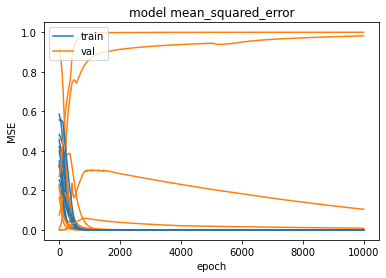

In [10]:
for i,history in enumerate(hists.values()):
  plt.plot(history.history['mean_squared_error'], c='tab:blue')
  plt.plot(history.history['val_mean_squared_error'], c='tab:orange')
  
plt.title('model mean_squared_error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

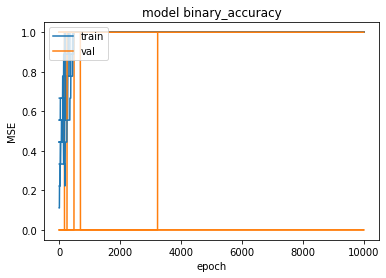

In [11]:
for i,history in enumerate(hists.values()):
  plt.plot(history.history['binary_accuracy'], c='tab:blue')
  plt.plot(history.history['val_binary_accuracy'], c='tab:orange')
  
plt.title('model binary_accuracy')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [12]:
t1 = pd.DataFrame.from_dict(q1).round(2)
t1

,Train,Output of flat network,Desired output,Class
0,0,0.01,1,east
1,1,1.00,1,east
2,2,1.00,1,east
3,3,1.00,1,east
4,4,1.00,1,east
5,5,0.00,0,west
6,6,0.32,0,west
7,7,0.00,0,west
8,8,1.00,0,west
9,9,0.09,0,west


## Question 2.

Implemente uma solução com base no modelo de aprendizado relacional contendo meta-redes para conectar conceitos das premissas. Este modelos deve conter 11 redes, uma para cada um dos seguintes conceitos conforme definição das paginas 136 e 137:

### metanet

In [13]:
"""
Alteramos a metanet para facilitar o uso dos pesos
"""
def model_v2():
  # features
  w = Input(shape=(1,), name='w')
  l = Input(shape=(1,), name='l')
  s = Input(shape=(1,), name='s')
  nc = Input(shape=(1,), name='nc')
  ls = Input(shape=(1,), name='ls')
  nl = Input(shape=(1,), name='nl')
  ncl = Input(shape=(1,), name='ncl')
  x_crc = Input(shape=(1,), name='x_crc')
  x_hex = Input(shape=(1,), name='x_hex')
  x_rec = Input(shape=(1,), name='x_rec')
  x_tri = Input(shape=(1,), name='x_tri')

  # east
  east = concatenate([
      w, 
      l,
      s,   
      nc,  
      ls, 
      nl,  
      ncl, 
      x_crc, 
      x_hex, 
      x_rec, 
      x_tri 
  ])

  east =  Dense(1, activation='sigmoid', name='east')(east)
  east = Model(inputs=[w, l, s, nc, ls, nl, ncl, x_crc, x_hex, x_rec, x_tri], outputs=east)

  return east

east = model_v2()
east.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
w (InputLayer)                  (None, 1)            0                                            
__________________________________________________________________________________________________
l (InputLayer)                  (None, 1)            0                                            
__________________________________________________________________________________________________
s (InputLayer)                  (None, 1)            0                                            
__________________________________________________________________________________________________
nc (InputLayer)                 (None, 1)            0                                            
__________________________________________________________________________________________________
ls (InputL

In [14]:
plot_model(east, show_shapes=False, show_layer_names=True)

### transform data

In [15]:
# transform data
df = read_data()
cols = [[c for c in df.columns if not(str.isdigit(c[-1])) or (str.isdigit(c[-1]) and int(c[-1])==n)] for n in range(1,5)]

data = [df[col] for col in cols]
for c, df in enumerate(data):
  df.columns = [name if not str.isdigit(name[-1]) else name[:-1] for name in df.columns]
  df['car'] = c+1

data = pd.concat(data)
data.reset_index(level=0, inplace=True)
data['train'] = data.pop('index')
drop_columns = ['Rectangle_next_to_hexagon', '']
data

,Number_of_cars,Number_of_different_loads,num_wheels,length,shape,num_loads,load_shape,Rectangle_next_to_rectangle,Rectangle_next_to_triangle,Rectangle_next_to_hexagon,Rectangle_next_to_circle,Triangle_next_to_triangle,Triangle_next_to_hexagon,Triangle_next_to_circle,Hexagon_next_to_hexagon,Hexagon_next_to_circle,Circle_next_to_circle,Class_attribute,car,train
0,5,4,2,1,6,3,2,0,1,0,0,0,1,0,0,1,0,1,1,0
1,4,3,2,0,9,1,3,0,1,0,1,0,0,0,0,0,0,1,1,1
2,4,2,2,0,6,1,0,0,0,0,0,1,0,1,0,0,0,1,1,2
3,5,2,2,0,7,1,3,1,1,0,0,1,0,0,0,0,0,1,1,3
4,4,3,2,0,1,1,3,0,1,0,1,0,0,0,0,0,0,1,1,4
5,3,2,2,1,0,3,0,0,0,0,0,0,0,1,0,0,0,0,1,5
6,4,2,2,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,6
7,3,2,3,1,0,1,2,0,0,0,1,0,0,0,0,0,0,0,1,7
8,5,2,2,0,7,1,0,1,0,0,1,0,0,0,0,0,0,0,1,8
9,3,1,2,0,9,1,2,1,0,0,0,0,0,0,0,0,0,0,1,9


### Train

In [16]:
def get_att(X):
  w = X['num_wheels'].T
  l = X['length'].T
  s = X['shape'].T
  nc = X['Number_of_cars'].T
  ls = X['load_shape'].T
  nl = X['Number_of_different_loads'].T
  ncl = X['num_loads'].T
  x_crc = np.sum(X[[col for col in X if col.endswith('circle')]], axis=1).T
  x_hex = np.sum(X[[col for col in X if col.endswith('hexagon')]], axis=1).T
  x_rec = np.sum(X[[col for col in X if col.endswith('rectangle')]], axis=1).T
  x_tri = np.sum(X[[col for col in X if col.endswith('triangle')]], axis=1).T

  return [w, l, s, nc, ls, nl, ncl, x_crc, x_hex, x_rec, x_tri]

def split(data, val_train):
  x_train = data.query(f'train != {val_train}')
  x_test = data.query(f'train == {val_train}')
  y_train = np.array(x_train.pop('Class_attribute'))
  y_test = np.array(x_test.pop('Class_attribute'))
  x_train = get_att(x_train)
  x_test = get_att(x_test)
  return x_train, x_test, np.array(y_train), np.array(y_test)

In [17]:
kf = KFold(n_splits=10, shuffle=False)
hists = dict()
q2_names =  [
  'Train',
  'Cars Accuracy',
  'Output of flat network', 
  'Desired output', 
  'Class'
]
q2 = {name: [] for name in q2_names}

for val_train in tqdm.tqdm(range(0,10)):
  x_train, x_test, y_train, y_test = split(data, val_train)
  east = model_v2()

  east.compile(
    loss = binary_crossentropy, 
    optimizer = 'adam',
    metrics = ['binary_accuracy']
  )

  hist = east.fit(
    x_train,
    y_train,
    validation_data=[x_test, y_test],
    epochs=10000,
    verbose=0,)
  hists[val_train] = hist

  q2['Train'].append(val_train)
  q2['Output of flat network'].append(east.predict(x_test)[0][0])
  q2['Desired output'].append(y_test[0])
  q2['Class'].append(str_att['Class_attribute'][int(y_test[0])])

100%|██████████| 10/10 [05:51<00:00, 35.13s/it]


### Results

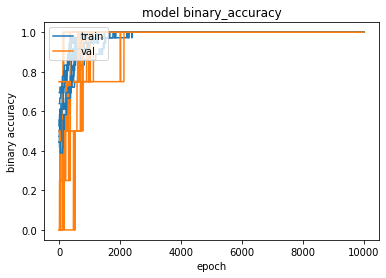

In [18]:
for i,history in enumerate(hists.values()):
  plt.plot(history.history['binary_accuracy'], c='tab:blue')
  plt.plot(history.history['val_binary_accuracy'], c='tab:orange')
  
plt.title('model binary_accuracy')
plt.ylabel('binary accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [19]:
"""
Salvando modelo
"""
model_json = east.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
east.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [20]:
"""
Definindo um array com os nomes das meta regras
"""
names = [
    'w', 
    'l',
    's',   
    'nc',  
    'ls', 
    'nl',  
    'ncl', 
    'x_crc', 
    'x_hex', 
    'x_rec', 
    'x_tri' 
]
"""
Essa função pega os pesos de cada meta regra e o bias
"""
def get_weight_by_name(name='east', network=None, names=names):
  network_weights = None
  network_bias = None
  """
  Get weight and names
  """
  for layer in network.layers:
    if (name in layer.name):
      network_weights = layer.get_weights()[0]
      network_bias = layer.get_weights()[-1][-1]
      break
  dict_weight = {}
  """
  Update dict weights
  """
  for i in range(len(names)):
    dict_weight.update({names[i]: network_weights[i][0]})
  return dict_weight, network_bias

In [21]:
"""
Usando a função get_weight_by_name
"""
weights, bias = get_weight_by_name(network=east)
weights

{'l': -0.34606236,
 'ls': 0.27316552,
 'nc': -0.20805866,
 'ncl': 0.10583914,
 'nl': 0.7406904,
 's': -0.07717702,
 'w': 0.06473166,
 'x_crc': -3.750919,
 'x_hex': 5.3770223,
 'x_rec': -4.1082835,
 'x_tri': 11.580743}

In [22]:
"""
Pegando o valor de weights e bias e separando em um dicionário
O valor de cada chave vale entrada * peso associado
exemplo
Se a entrada do shape vale 5, e o peso dessa meta regra vale 2
então na chave será adicionado o valor 5 * 2 = 10 
Saída => {
  'l': 2.5,
  'x_tru': -1.25,
  .
  .
  .
}
"""
values = []
for count in range(len(np.array(x_train[0]))):
  result = [float(a[count]) for a in np.array(x_train)]
  value = {'bias': bias}
  i = 0
  for key in weights:
    current_weight = weights[key]
    value.update({key:result[i] * current_weight})
    i = i + 1
  values.append(value)

In [23]:
"""
Essa função pega as meta regras que mais impactaram na predição
Caso o type seja true, então ele pega os principais valores positivos,
caso o type seja false, então ele pega os principais valores negativos
A função para quando o resultado da função sigmoid com a remoção das feautes
mais relavantes tem o valor da classe oposta
"""
def get_most_important_name(value, type=True):
  final_result = sum(list(value.values()))
  obj = sorted(value.items(), key=lambda x: x[1])
  to_return = []
  if (type):
    while (final_result >= 0.5):
      to_return.append(obj[-1][0] )
      final_result = final_result - obj[-1][-1]
      obj.remove(obj[-1])
  else:
    while (final_result < 0.5):
      to_return.append(obj[0][0] )
      final_result = final_result - obj[0][-1]
      obj.remove(obj[0])
  return to_return

In [24]:
"""
Definição da função sigmoid
"""
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [25]:
"""
A partir do nome das meta regras mais importantes
é possível retornar uma frase associada a ela
"""
dict_inverse_name = {
    'x_tri': 'possui triângulo',
    'x_crc': 'possui círculo',
    'x_hex': 'possui hexagono',
    'nc': 'pela quantidade de vagões',
    'x_rec': 'possui retângulo',
    'bias': None,
    's': 'pelo seu formato',
    'w': 'pelo número de rodas',
    'ncl': 'pelo número de cargas dos seus vagões',
    'nl': 'pela quantidade de carga',
    'ls': 'pelo formato das suas cargas',
    'l': 'pelo comprimento do vagão'
}

In [26]:
"""
Dado os fatores de uma predição e o resultado final da predição
essa função retorna a frase interpretável de acordo com os valores
mais impactantes da variável 'factors'
"""
def nlp_process(direction='west', factors=[]):
  direction = 'oeste' if direction == 'west' else 'leste'
  string = f'esse trem foi para {direction}, pois'
  for factor in factors:
    if (dict_inverse_name[factor] is not None):
      string = string + f' {dict_inverse_name[factor]},'
  return string[:-1]

In [27]:
"""
Usando um fold da variável 'data'
As interpretações nessa célula foram feitas para apenas esse fold
é possível fazer para outros folds
"""
for value in values:
  """
  Se o retorno da função é sigmoid então a classe prevista é leste
  Caso contrário é oeste
  em 'value', como no dicionário já foi aplicado o produto da entrada pelo peso
  basta somar todos os valores e aplicar o sigmoid que teremos o resultado da predição
  """
  if (round(sigmoid(sum(list(value.values())))) == 1):
    name = get_most_important_name(value, type=True)
    print(nlp_process('east', name))
  else:
    name = get_most_important_name(value, type=False)
    print(nlp_process('west', name))

    

esse trem foi para leste, pois possui triângulo, possui hexagono
esse trem foi para leste, pois possui triângulo
esse trem foi para leste, pois possui triângulo
esse trem foi para leste, pois possui triângulo
esse trem foi para leste, pois possui triângulo
esse trem foi para oeste, pois possui círculo
esse trem foi para oeste, pois possui círculo
esse trem foi para oeste, pois possui círculo
esse trem foi para oeste, pois possui retângulo, possui círculo, pela quantidade de vagões
esse trem foi para leste, pois possui triângulo, possui hexagono
esse trem foi para leste, pois possui triângulo
esse trem foi para leste, pois possui triângulo
esse trem foi para leste, pois possui triângulo
esse trem foi para leste, pois possui triângulo
esse trem foi para oeste, pois possui círculo
esse trem foi para oeste, pois possui círculo
esse trem foi para oeste, pois possui círculo, pelo seu formato
esse trem foi para oeste, pois possui retângulo, possui círculo, pela quantidade de vagões
esse trem 